# Data Pre-Processing Steps
`Data Understanding >> Check Datatypes >> Handle Null Values >> Remove Duplicates >> Visualization >> Data Splitting >> Normalization >> Encoding`

---

In [1]:
# import neccessary libraries

import pandas as pd # for data manipulation
import numpy as np # for numerical operations

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization

In [2]:
# read data
data = pd.read_csv(r"D:\Courses\DEPI R4 - Microsoft ML\Technical\Datasets\Data Analysis\Titanic.csv")

# display data
display(data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
# drop columns (ID, Name, Ticket)
data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

# display first 5 rows
display(data.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


## Check Datatypes
---

In [4]:
# check dtype of each column, then convert to appropriate dtype if necessary
data_types = data.dtypes
data_unique = data.nunique()

# create a dataframe to display data types and unique values
about = pd.DataFrame({"Data Type": data_types, "Unique Values": data_unique }).T

# display the dataframe
display(about) # then take necessary actions

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Data Type,int64,str,float64,int64,int64,float64,str,str,int64
Unique Values,3,2,88,7,7,248,147,3,2


In [5]:
# as function
def check_data_types(data):
    '''
    Function to check data types and unique values of each column in a dataframe
    '''
    data_types = data.dtypes
    data_unique = data.nunique()
    return pd.DataFrame({"Data Type": data_types, "Unique Values": data_unique }).T

display(check_data_types(data))

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Data Type,int64,str,float64,int64,int64,float64,str,str,int64
Unique Values,3,2,88,7,7,248,147,3,2


In [6]:
# convert specified columns to category dtype
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]
data[columns] = data[columns].astype("category")


# apply function
display(check_data_types(data))

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Data Type,category,category,float64,category,category,float64,str,category,category
Unique Values,3,2,88,7,7,248,147,3,2


In [7]:
# as function
def handle_types(columns):
    '''
    Function to convert specified columns to category dtype
    '''
    data[columns] = data[columns].astype("category")

# apply function
handle_types(columns)
display(check_data_types(data))

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Data Type,category,category,float64,category,category,float64,str,category,category
Unique Values,3,2,88,7,7,248,147,3,2


## Handle Null Values
---

In [8]:
# Calculate the raw counts and the ratio
null_counts = data.isnull().sum()
null_ratios = (null_counts / len(data)) * 100

# Combine into a DataFrame
null_summary = pd.DataFrame({"Null Values": null_counts, "Ratio": null_ratios.map(lambda x: f"{x:.1f}%")}).T

# Display
display(null_summary)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Null Values,0,0,177,0,0,0,687,2,0
Ratio,0.0%,0.0%,19.9%,0.0%,0.0%,0.0%,77.1%,0.2%,0.0%


In [9]:
# Calculate counts and ratios
null_counts = data.isnull().sum()
null_ratios = (null_counts / len(data)) * 100

# Create the DataFrame with both rows
null_summary = pd.DataFrame({"Null": null_counts, "Ratio": null_ratios.map(lambda x: f"{x:.1f}%")}).T

# Display
display(null_summary)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Null,0,0,177,0,0,0,687,2,0
Ratio,0.0%,0.0%,19.9%,0.0%,0.0%,0.0%,77.1%,0.2%,0.0%


In [10]:
# handle null values - drop rows
data = data.dropna(subset=["Embarked"])

In [11]:
# handle null values - drop columns
data = data.drop(columns="Cabin")

In [12]:
# handle null values - fill null values in "Age" column with median age (change)
median_age = data["Age"].median()
data["Age"] = data["Age"].fillna(median_age)

In [13]:
# as function
def check_null_values(data):
    '''
    Function to check null values in dataframe
    '''
    null_counts = data.isnull().sum()
    null_ratios = (null_counts / len(data)) * 100

    return pd.DataFrame({"Null": null_counts, "Ratio": null_ratios.map(lambda x: f"{x:.1f}%")}).T

display(check_null_values(data))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Null,0,0,0,0,0,0,0,0
Ratio,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


## Detect Outliers
---

In [14]:
num_columns = data.select_dtypes("number").columns # num_columns = ['Age', 'Fare']

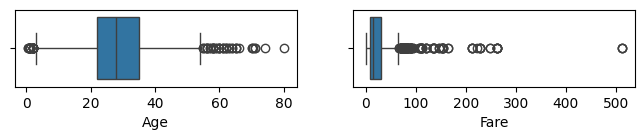

In [15]:
# plot boxplots for numerical columns
plt.figure(figsize=(8, 1)) # set figure size
for i , col in enumerate(num_columns): # enemerate to get index and column name
    plt.subplot(1, 2, i + 1) # create subplot
    sns.boxplot(x=data[col], orient='h') # plot boxplot horizontally

In [16]:
# IQR method >> [lower_bound, median, upper_bound] >> Q1 = (25th percentile) , Q2 = (50th percentile) median , Q3 = (75th percentile), IQR = Q3 - Q1, upper_bound = Q3 + 1.5*IQR, lower_bound = Q1 - 1.5*IQR

# loop through numerical columns and handle outliers using IQR method
for col in num_columns:
    
    # calculate Q1, Q3, IQR, Lower_Fence, Upper_Fence
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    
    # identify outliers
    Lower_Outliers = data[data[col] < Lower_Fence][col].values
    Upper_Outliers = data[data[col] > Upper_Fence][col].values

    # replace outliers with Lower_Fence and Upper_Fence
    data[col] = data[col].replace(Lower_Outliers, Lower_Fence)
    data[col] = data[col].replace(Upper_Outliers, Upper_Fence)

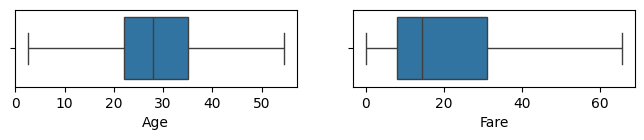

In [17]:
# plot boxplots for numerical columns
plt.figure(figsize=(8, 1)) # set figure size
for i , col in enumerate(num_columns): # enemerate to get index and column name
    plt.subplot(1, 2, i + 1) # create subplot
    sns.boxplot(x=data[col], orient='h') # plot boxplot horizontally

## Remove Duplicates
---

In [18]:
# remove duplicates if any, then reset index
data.duplicated().sum()

np.int64(129)

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
# remove duplicates if any, then reset index
data.duplicated().sum()

np.int64(0)

## Save cleaned data
---

In [21]:
# save cleaned data to new csv file
data.to_csv(r"D:\Courses\DEPI R4 - Microsoft ML\Technical\Datasets\Data Analysis\Titanic_Cleaned.csv", index=False)